In [82]:
#some generic imports

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special


---
### Counting

 - Multiplication Rule - If an experiment consists of $k$ components for which the number of possible outcomes
are $n_1, . . . , n_k$ , then the total number of experimental outcomes (the size of the sample
space) is equal to

$n_1 × n_2 × ··· × n_k$


 - Permutation - Order matters so (1,0) and (0,1) mean different things.
 
 $ p^n_k = \frac{n!}{(n-k)!} $  -  *without replacement*
 
 
 - Combination - Order doesn't matter so (1,0) and (0,1) mean same thing.
 
 $ c^n_k = \frac{n!}{k!(n-k)!} $ - *without replacement*
 
 ---

Before we proceed, it is good idea to learn about Sets and some Python implementations.

A $Set$ is simply a collection of items (of any type). A set can have as many items as you wish. A set isn't ordered. And there is no duplicate item in the set. In Python we use `set` function to define a set. 

In [7]:
a = set([1,1,1,3,4,6,4,3,6,5])
a

{1, 3, 4, 5, 6}

Just like `[]` is used to create list, we can use `{}` to create set. 

In [9]:
b = {1,2,7,6,6} 
b  # this will exclude repeated item

{1, 2, 6, 7}

In [10]:
type(a), type(b)

(set, set)

However, unlike list, tuples or dictionary, we can't create empty set like this -

In [61]:
a = {} 
type(a)

dict

In [64]:
a = set() #this is the way
type(a)

set

Like other collections, sets support `x in set`, `len(set)`, and `for x in set`. Being an unordered collection, sets do not record element position or order of insertion. Accordingly, sets do not support indexing, slicing, or other sequence-like behavior.

Following methods are available for a given set - 

In [56]:

c = set

[i for i in dir(c) if '__' not in i]

['add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

#### Disjoint sets

In [1]:
#Return True if the set has no elements in common with other. 
#Sets are disjoint if and only if their intersection is the empty set.

a = {1,2,3}
b = {4,5}
c = {1,4,5}

a.isdisjoint(b), a.isdisjoint(c)

(True, False)

#### Subsets

Both `set.issubset(other)` mehod and `set <= other` operator are avilable.

In [22]:
a = {1,2}
b = {1,2,3}
c = {1}

a.issubset(b), a.issubset(c)

(True, False)

In [24]:
a <= b

True

Note that `<` check if `set` is *proper subset* of `other`. That is, it checks if `set <= other and set != other`.

In [25]:
b < b

False

**Supersets**

Similarily we have `set.issuperset(other)` method. Operator for this is `>=`. Also for *proper supersets*, we have `>` operator.

In [28]:
b.issuperset(a), b>=a, b > a

(True, True, True)

In [30]:
a.issuperset(a), a > a

(True, False)

**Union and Intersection**

1. `set.union(*other)` method and `|` operator (`set | other1 | other2 |...`)



2. `set.intersection(*other)` method and `&` operator (`set & other1 & other2...`)

In [2]:
set1 = {1,2,3}
b = {2,3,4}
c = {4,5,6}

others = [b,c]

set1.union(*others), set1.intersection(*others)

({1, 2, 3, 4, 5, 6}, set())

In [7]:
set1.union(b).union(c)

{1, 2, 3, 4, 5, 6}

In [6]:
set1.union(c)

{1, 2, 3, 4, 5, 6}

In [36]:
# operator version

set1 | b | c, set1 & b & c

({1, 2, 3, 4, 5, 6}, set())

#### Difference and symmetric Difference

1. `set.difference(*other)` will return a new set with elements from *set* which are not in *other sets*. The operator for this method is `-`. 


2. `set.symmetric_difference(other)` return a new set with elements in either the set or other but not both. The operator for this method is `^`.

In [37]:
set1 = {1,2,3,4,7,8,11,13}
b = {8,11}
c = {13}

other = [b,c]

set1.difference(*other), set1-b-c

({1, 2, 3, 4, 7}, {1, 2, 3, 4, 7})

In [38]:
set1.symmetric_difference(b), set1 ^ b

({1, 2, 3, 4, 7, 13}, {1, 2, 3, 4, 7, 13})

In [39]:
set1 & b

{8, 11}

**Important** -  Methods mentioned above, such as `union()`  can take any iterable. However, operators like `|` operate
only on sets. 

---

## Probability

<br>



**Sample Space** -  Collection of all possible outcomes of a random experiment. It is assumed that all outcomes are equally likely. For a coin flipping experiment, sample space would be 

$S = \{H, T\}$

For a fair 6-sided dice, sample space would be - 

$S= \{1,2,3,4,5,6\}$

<div class="alert alert-block alert-warning">
If $S = \{O_1, O_2,....,O_n\}$, then

$$P(O_i)\ge 0\  for\  i\  \in \{1,2,...,n\},$$ and

    
$$P(O_1)+P(O_2)+....+P(O_n) = 1$$
</div>

<br>

**Event** - Any subset of sample space (or possible outcomes) having some property we're interested in. Suppose I flip a coin twice, the sample space would be-

$S = \{HH,HT,TH,TT\}$

So $\{HH\}$ would be one possible event. Similarily, $\{HH,TH\}$ is also an valid event. 

<br>

**Probability of an event** - This is simply the number of outcomes in an event $E$ divided by the numbers of outcomes in sample space $S$.

<div class="alert alert-block alert-warning">
$$P(E) = \frac{E}{S}$$
</div>


If a sample space $S$ is divided in $n$ *mutually exclusive* events then following hold true -

<div class="alert alert-block alert-warning">
If $S = \{E_1, E_2,....,E_n\}$, then

$$P(E_i)\ge 0\  for\  i\  \in \{1,2,...,n\}, \ \ \ \ \ (1)$$
    
and

    
$$P(E_1)+P(E_2)+....+P(E_n) = 1 \ \ \ \ \ \ (2)$$
</div>



Now, let us write a function to compute the basic probability - 

In [42]:
# stolen from Peter Norvig notebook

from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))



You may ask: Why does the definition of `P` use `len(event & space)` rather than `len(event)`? Because I don't want to count outcomes that were specified in `event` but aren't actually in the sample space. Consider:

In [45]:
D = {1, 2, 3, 4, 5, 6}       #event
even = {2, 4, 6, 8, 10, 12}  #sample space

P(even, D)

Fraction(1, 2)

Here, `len(event)` and `len(space)` are both 6, so if just divided, then `P` would be 1, which is not right.
The favorable cases are the *intersection* of the event and the space, which in Python is `(event & space)`.
Also note that I use `Fraction` rather than regular division because I want exact answers like 1/3, not 0.3333333333333333.

<br>
<br>

### Non- Equiprobable Outcomes and Probability Distributions

There are experiments whose outcomes are not equally likely to happen. In those cases, be can't use the generic formula (desired no of outcomes/total no of outcomes) but rules (1) and (2) mentioned above still hold true for them. 

Now, suppose we have a set of $n$ mutually exclusive events that together cover all possible
outcomes in our sample space $S$. Such a set is called a PARTITION of the sample space as shown below 

<img src="images/partition.PNG" width="350" height="100"/>

**Probability distribution** is simply the set $\{P(E_1), P(E_2),... \}$. Note again that events $E_i$ are mutually exclusive. 

### Combining Events

A sample space consists of multiple events. So far we assumed events to be mutually exclusive. Now we'll explore situations
where events overlap with one another. 

#### Event Complement and Union

Suppose I have a list of words. It is given that the probability a random word starts from $t$ is 1/7. What is the probability that a random word *does not* start from $t$?

It doesn't take much effort to see that a word either starts from $t$ or it doesn't. So we basically have two events: first, a word starts with $t$ and second, a word doesn't start with $t$. Again, it is easy to see these two events are mutually exclusive and they collectively form a complete sample space. If we denote former event as $E$ and later event as $\overline E$, it is obvious that -

$E+\overline E = S\ (sample\ space)$

This implies that

$P(E)+P(\overline E) =  1$

So, we can see that the probability that a random word doesn't start from $t$ is $1 - 1/7 = 6/7$.

But what if 2 events aren't mutually exclusive? 

**Example 1:-** As an example, consider following data - 

Student|Country
-------|------
Andrew|UK
Sebastian|Germany
Wei|China
Fiona|UK
Lea|Germany
Ajitha|UK
Sarah|UK

First 3 are male students while remaining 4 are female students. 

Now, our question is: what is the probability that a random student is female *or* from UK? In other words, calculate $P(A\cup B)$.

This is clearly the case of overlapping data. For example, Fiona is both female and from UK. First we simply find the probability $P(A)$ that a random student is female. We can see that $P(A)$ is 4/7. Now we find the probability $P(B)$that a random student is from UK which is again 4/7. We can see that even $A$ and $B$ aren't mutually exclusive so $P(A)+P(B) \neq 1$. Actually we'll have $P(A)+P(B) \gt 1$. It is because 3 students (Fiona, Ajitha and Sarah) are present in both events and hence have been accounted for *twice*. Careful observation shows us that this group consisting of Fiona, Ajitha and Sarah is essentailly $(A\cap B)$ so $P(A\cap B)=3/7$. Summing up all these, we can see that 

$P(A\cup B) = P(A)+P(B)-P(A\cap B)$

This implies that 

$P(A\cup B) = \frac{8}{7}-\frac{3}{7} = \frac{5}{7}$

In fact, we can write a rule for this  - 

<div class="alert alert-block alert-warning">$$P(A\cup B)+P(A\cap B) = P(A)+P(B)\ \ \ \ \ \ (3)$$</div>


See following venn diagram illustrating above rule - 

![](images\prob3.png)




Below is Python code to calculate which elements of our data constitute the required event. To do this, we denote each data point in such a way that it captures all the information. For example, `m1` in `m1U` tells us that first person is male and `U` tells us that he is from UK.   

In [69]:
space = {'m1U', 'm2G', 'm3C', 'f1U', 'f2G', 'f3U', 'f4U'} #sample space

event = set()

for i in space:
    if ('f' in i) or ('U' in i):
        event.add(i)
                
P(event, space)        

Fraction(5, 7)

Shorter version of above code -

In [74]:
space = {'m1U', 'm2G', 'm3C', 'f1U', 'f2G', 'f3U', 'f4U'} #sample space

event = {i for i in space if ('f' in i) or ('U' in i)}
                
P(event, space) 

Fraction(5, 7)

${P(A ∩ B) + P(A ∩ B') = P(A)}$ 

$P(A ∩ B) + P(A' ∩ B) = P(B)$

$P(A ∪ B) + P(A ∩ B) = P(A) + P(B)$

$(A ∪ B)' = A' ∩ B'$

${(A ∩ B)' = A' ∪ B'}$



<br>

### Intersecting events, Joint probabilities and the Law of Total Probability

<br>

Now let’s look at event intersections. These come up so often that there is a special term for the probability of the intersection of two events: it is called the JOINT PROBABILITY of A and B, written $P(A\cap B)$.

Now, suppose we have a set of events $\{E_1....E_n\}$ that partition the sample space, and we have some other event $B$ that is also in the sample space. The diagram below illustrates such a situation and provides some intuition for the LAW OF TOTAL PROBABILITY, also known as the SUM RULE:

<div class="alert alert-block alert-warning">
$$P(B) = \sum_{i=1}^n P(B\cap E_i)\ \ \ \ \ \ \ \ (4)$$
</div>
    
The law of total probability tells us that we can compute the probability of $B$ by adding up the joint probability of $B$ with each of the $E_i$.

![](images\joint.png)

Consider earlier example again. We partition the sample space according to the country that each student comes from, with $E_1$ = “student is British”, $E_2$ = “student is Chinese”, and $E_3$ = “student is German”. Also let $B$ be the event that the student is female. Apply the law of total probability to compute $P(B)$, and check that the result is the same as when computing $P(B)$ directly.

Using the law of total probability, we have

$P(B) = P(B\cap E_1)+P(B\cap E_2)+P(B\cap E_3)$

$= 3/7+0/7+1/7 = 4/7$

In [75]:
space = {'m1U', 'm2G', 'm3C', 'f1U', 'f2G', 'f3U', 'f4U'} #sample space

event = {i for i in space if ('f' in i) }
                
P(event, space) 

Fraction(4, 7)

### Conditional Probabilities, Independence, and Bayes' Rule
<br>
<br>

#### Definition of conditional probability

<br>

CONDITIONAL PROBABILITY is one of the most important concepts of probability theory. A conditional probability expresses the probability that some event $A$ will occur, given that (conditioned on the fact that) event $B$ occurred. The conditional probability of $A$ given $B$, written $P(A|B)$, where the $|$ is pronounced “given”, is defined as

<div class="alert alert-block alert-warning">
$$P(A|B) = \frac{P(A\cap B)}{P(B)}\ \ \ \ \ \ (5)$$
</div>
    
When $B \subset A$, this implies that $A \cap B$ equals to $B$. This means whenever $B$ happens, $A$ also happens. Hence, probability of $A$ conditional on event $B$ is 1. This is also apparent when we put $P(B)$ in place of $A \cap B$ -

$P(A|B) = \frac{P(A ∩ B)}{P(B)} = \frac{P(B)}{P(B)} = 1$ 

Let's consider the earlier 'student vs country' data. What is the probability  that a given student is british male? Assume that event $A$ is 'student is male' and event $B$ is 'student is from UK'. So $P(A|B)$ (student is male given he is from UK) is:

$P(A|B) = \frac{P(A\cap B)}{P(B)} =  (1/7)/(4/7) = 1/4$

Although you can easily verify this by looking at space set, other examples may not be so simple.
<br>
<br>
#### The product rule and chain rule

<br>

The equation $P(A|B) = \frac{P(A\cap B)}{P(B)}$ can be rewritten as $P(B|A) = \frac{P(B\cap A)}{P(A)}$. Of course, $P(A|B)$ and $P(B|A)$ aren't same things. However, note that:

${P(B\cap A)} = {P(A\cap B)}$

This means:

<div class="alert alert-block alert-warning">
$$P(A\cap B) = P(B\cap A) = {P(A|B)}{P(B)} = {P(B|A)}{P(A)}\ \ \ \ \ \ (6)$$
</div>   

<br>

**Example 2:-** Suppose I have a jar of marbles, and I choose one uniformly at random. Each marble is either red (R), green (G), or blue (B). In two-thirds of the marbles, these colors are solid (S), while in the remainder the colors are patchy. If I tell you that the probability of getting a red marble given that I have a solid-colored one is 1/2, can you compute the probability that my chosen marble is solid red?

<br>

**Solution**  First, see what we know. two-thirds marbles are solid. This means $P(S) = 2/3$. Also, $P(R|S) = 1/2$. Now we wish to calculate the probability that a given marble is both solid and red, that is $P(R \cap S)$. Using the formula for conditional probability, we can write -

$P(R \cap S) = P(R|S)P(S) = (1/2)(2/3)=1/3$

<br>

**Example 3:-** Now suppose the probability of the marble being blue given that it’s patchy
is 1/5. What is the probability of getting a patchy blue marble?

**Solution** We were not given the probability of a patchy marble, but the previous example stated that all marbles are either solid or patchy, and that $P(S)$, the probability of a solid-color marble, is 2/3. So we can compute the probability of a patchy marble as $P(\overline S)$ = 1 - $P(S)$ = 1/3. Then $P(B\cap \overline S) = P(B|\overline S) P(\overline S)$ = (1/5)(1/3) = 1/15

--- 

One consequence of the product rule is an alternative formulation of the law of total probability. We can use the product rule to replace the joint probabilities in (4) with conditional probabilities:


<div class="alert alert-block alert-warning">
$$P(B) = \sum_{i=1}^n P(B\cap E_i) = \sum_{i=1}^n P(B|E_i)P(E_i)\ \ \ \ \ \ (7)$$
</div>

The product rule can only handle the intersection of two events, but notice that we can apply it iteratively to expand the joint probability of several events into a product of several conditional probabilities. For example:

$P(A\cap B\cap C\cap D) = P(A|B\cap C\cap D)P(B\cap C\cap D)$

$=  P(A|B\cap C\cap D)P(B| C\cap D)P(C\cap D)$

$ = P(A|B\cap C\cap D)P(B| C\cap D)P(C|D)P(D)$

where in each step, we expanded the final term using the product rule. This is possible
because a complex event such as $B\cap C\cap D$ is still just an event: it can take the place of $B$ in Eq (6).

This iterative rewriting process is summarized in a general form called the CHAIN RULE:

<div class="alert alert-block alert-warning">
$$P(E_1 \cap E_2 \cap...\cap E_n) = \prod_{i=1}^n P(E_i|E_{i+1}\cap....\cap E_n)$$
</div>    

<br>

#### Conditional Probability Distribution

<br>

Suppose we have a set of events $\{E_1.....E_n\}$ that partition the sample space, and we consider the conditional probabilities of these events conditioned on some other event $B$, where $P(B) > 0$. Then these conditional probabilities $P(E_1|B).....P(E_n|B)$ form a distribution—the CONDITIONAL PROBABILITY DISTRIBUTION conditioned on $B$. We can show that this set forms a distribution by first showing that the sum of the probabilities is one:

<br>

$\sum_{i=1}^n P(E_i|B) = \sum_{i=1}^n \frac{P(E_i\cap B)}{P(B)}$ - by definition of conditional probability

<br>

$= \frac{1}{P(B)} \sum_{i=1}^n P(E_i \cap B)$

<br>

$= \frac{1}{P(B)} P(B)$ - by law of total probability

<br>

$=1$

<br>

We also need to show that all the $P(Ei|B)$ are between 0 and 1. We know that $P(B)$ and each $P(E_i\cap B)$ is between 0 and 1, because they are probabilities. Also, $P(E_i \cap B)$ cannot be larger than $P(B)$, because the intersection of $B$ with another set can’t be larger than $B$. But if $P(E_i \cap B) \le P(B)$, and $P(B) > 0$ and $P(E_i \cap B) \ge 0$, then $\frac{P(E_i\cap B)}{$P(B)}$ must be between 0 and 1.

Because a conditional probability distribution is a distribution, the rules for computing probabilities that we discussed already apply just as well to conditional distributions, provided we keep the conditioning event in all parts of the equation. In particular,

<br>

$P(\overline E|B) = 1 - P(E|B)$

<br>

$P(A\cap B | C) = P(A | C) + P(B | C) - P(A \cap B | C)$

<br>

**Example 4:-** Refer to example 2. Now we've been given two more pieces of information: the probability of the marble being blue given that it’s patchy is 1/5 and the probability of a green marble given a patchy marble is 2/5. What’s the probability of a red marble given a patchy marble?

**Solution-** We now have a lot of different pieces of information to keep straight. Let’s first
write down all the information that was explicitly stated in each of the examples:

<br>

<center>
$\begin{vmatrix}
{P(S)= 2/3} & {P(R|S) = 1/2} & P(B|\overline S) = 1/5
\\
{}&{}&{P(G|\overline S)=2/5}
\end{vmatrix}$
</center>
<br>

Notice that I have arranged the information so that each column forms part of a conditional distribution, conditioned on a different thing (either nothing, or $S$, or $\overline S$). We want to know $P(R|\overline S)$, which would belong in the third column, and we also know that adding up all the items in that distribution should equal one. But $P(R|\overline S)$ is the only item missing from the distribution. Therefore, 

$P(R|\overline S) = 1- (P(B|\overline S)+P(G|\overline S))$, or 2/5.

<br>

#### Conditional and Joint Probability Tables

Another way of representing a conditional probability distribution is using a CONDITIONAL
PROBABILITY TABLE, or CPT. A CPT for the distribution conditioned on A has one column for each event $E_i$ in the partition. Each column is labelled with $E_i$ and lists the value of $P(E_i|A)$. So, the CPT for $\overline S$ before solving the previous example would be:

<br>

<center>
$\begin{vmatrix}R&G&B\\{}&{2/5}&{1/5}\end{vmatrix}$
</center>

<br>

This table makes it completely clear that $R$ is the only missing value, and therefore can be filled in with the value that makes the row sum to one.

Depending on what problem we are trying to solve, it may be more useful to construct a table listing joint probabilities rather than conditional probabilities (a JOINT PROBABILITY TABLE, or JPT). This kind of table assumes we have two different partitions of the sample space, $\{D_1....D_n\}$, and $\{E_1.....E_m\}$ (such as our partitions into solid/patchy and
red/blue/green in the marble example). Each row in the table represents a $D_i$, and each column represents an $E_j$. The value in cell $(i; j)$ is $P(D_i;E_j)$.

<br>

**Example 5:** Construct a joint probability table for the scenario from Example 3, where the rows represent the S and :S events, and the columns represent the color events. Fill in the cells for which we have computed values already in previous examples, then fill in as many additional cells as possible given the other information we have so far.

**Solution-** The table initially looks like this, with the two values we computed in Examples 2 and 3 - 

<br>

<center>
$\begin{vmatrix}&R&G&B\\S&{1/3}&{}&{}\\\overline S&&&1/15\end{vmatrix}$
</center>

<br>

Using the information from Example 4, we can then compute two additional cells as $P(R|\overline S)P(\overline S)$ and $P(G|\overline S)P(\overline S)$. The table now looks like this:

<br>

<center>
$\begin{vmatrix}&R&G&B\\S&{1/3}&{}&{}\\\overline S&2/15&2/15&1/15\end{vmatrix}$
</center>

<br>

Without further information, the two remaining cells remain unknown.

Notice that adding up the values in the $\overline S$ row gives a value of 1/3, which is the same value we computed earlier for $P(\overline S)$. This is not a coincidence! It is the law of total probability in action: look again at Eq 4 and you’ll see that adding up the values in any row or column of a JPT will give the probability of the event labelling that row or column.

It is often useful to write down the summed probability of each row and column in the margins of the JPT as an aid to problem solving. The probabilities we end up with in the margins are sometimes called MARGINAL PROBABILITIES, and using the law of total probability to compute one is called MARGINALIZATION. That is, if we are given $P(S\cap R)$, $P(S\cap G)$, and $P(S\cap B)$, then computing $P(S)$ by summing the three joint probabilities would
be “marginalizing over” (or “marginalizing out”) the other events to obtain the marginal probability of $S$.

<br>

**Example 6:-** Given that $P(B) = 1/5$, see if this information is enough to fill in the rest of  the JPT and its margins?

<br>

**Solution-** Yes, given information is enough to complete the JPT alongwith its margins.

Recall that $P(S)$ was given as 2/3, and $P(\overline S)$ was then computed as 1/3. So we have:

<br>

||$$R$$|$$G$$|$$B$$|$${}$$|
---|---|---|---|---|
$$S$$|1/3|||2/3
$$\overline S$$|2/15|2/15|1/15|1/3
||||1/5|

<br>

Now we can fill in $P(R) = 1/3+2/15 = 7/15$. Also, $P(B\cap S) = P(B)-P(B\cap \overline S) = 2/15$:

<br>

||$$R$$|$$G$$|$$B$$|$${}$$|
---|---|---|---|---|
$$S$$|1/3||2/15|2/3
$$\overline S$$|2/15|2/15|1/15|1/3
||7/15||1/5|

<br>

We can now compute $P(G\cap S)$ as $P(S)-P(R\cap S)-P(B\cap S)$ and then $P(G)$ as $(G\cap S)+P(G\cap \overline S)$. Or we could find $P(G)$ first, as $1-P(R)-P(B)$, and compute $P(G\cap S)$ from there. Either way, we end up with:

<br>

||$$R$$|$$G$$|$$B$$|$${}$$|
---|---|---|---|---|
$$S$$|1/3|11/5|2/15|2/3
$$\overline S$$|2/15|2/15|1/15|1/3
||7/15|1/3 |1/5|1

<br>

I added a 1 in the bottom right corner as a reminder that the values in the row margin, as
well as the values in the column margin, as well as the values in the non-marginal part of the
table, all add up to 1.


#### Independent Events
<br>
Two events are $A$ and $B$ are said to be independent iff (if and only if)
<br>

$P(A|B) = P(A)$

This means whether or not $A$ occcurs doesn't depend on the occurence of $B$. Recall that

<br>

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

<br>

<div class="alert alert-block alert-warning">
Combining above two gives us the rule for independent events $A$ and $B$ -

$$P(A \cap B) = P(A)P(B)$$
</div>
<br>


**Example 7: -** Using Eq $P(A \cap B) = P(A)P(B)$ and the joint probability table computed in Example 6,
determine which of the possible pairs of events are independent.

**Solution -** To solve this problem, for each pair of events we check whether the joint probability is equal to the product of the probabilities of the individual events. Put another way, is the value in cell $(i; j)$ equal to the product of the marginal value in row $i$ times the marginal value in column $j$? We find that $P(S \cap R) \neq P(S)P(R)$, so $S$ and $R$ are not independent. Similarly for $(\overline S\cap R)$, $(S\cap G)$, and $(\overline S\cap G)$. However, $P(S\cap B) = P(S)P(B)$, so $S$ and $B$ are independent; and similarly for $\overline S$ and $B$.

In fact, if we look back at the CPT we computed for $\overline S$ at the beginning of Section 4.4, we see that $P(B|\overline S) = 1/5$, which is equal to $P(B)$ in the joint probability table margin. So we also could have determined these variables were independent using Eq $P(A \cap B) = P(A)P(B)$.


---



#### Bayes' Rule

<br>
This is perhaps the most important part of probability theory. It is imperative that we understand this very thoroughly and carefully. 

From the difiniton of conditional probability, we have:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

Also, we have (from product rule):

$P(A\cap B) = P(B\cap A) = {P(A|B)}{P(B)} = {P(B|A)}{P(A)}$

Manipulating above two give us - 

<div class="alert alert-block alert-warning">$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$</div>

<br>

Above, $p(A/B)$ is called the **posterior probability**, $p(A)$ **prior probability**, $p(B|A)$ likelihood and $p(B)$ is called **normalizing constant**.

Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

This is a conditional probability; we want $p(Bowl \;1\;|\;vanilla)$, but it is not obvious how to compute it. If I asked a different question—the probability of a vanilla cookie given Bowl 1—it would be easy:
$p(vanilla\;|\;Bowl\;1)$ = 3/4.
Sadly, $p(A|B)$ is not the same as $p(B|A)$, but there is a way to get one
from the other: Bayes’s theorem.

For our example, I’ll write B1 for the hypothesis that the cookie came from Bowl 1 and V for the vanilla cookie.
Plugging in Bayes’s theorem we get

$$p(B1|V) =p(B1)\frac{p(V|B1)}{p(V)}$$

The term on the left is what we want: the probability of Bowl 1, given that
we chose a vanilla cookie. The terms on the right are:

 - $p(B1)$: This is the probability that we chose Bowl 1, unconditioned by what kind of cookie we got. Since the problem says we chose a bowl at random, we can assume $p(B1)$ = 1/2.
 
 - $p(V|B1)$: This is the probability of getting a vanilla cookie from Bowl 1, which is 3/4.
 
 - $p(V)$: This is the probability of drawing a vanilla cookie from either bowl. Since we had an equal chance of choosing either bowl and the bowls contain the same number of cookies, we had the same chance of choosing any cookie. Between the two bowls there are 50 vanilla and 30 chocolate cookies, so $p(V)$ = 5/8. 
 
Putting it together, we have - 

$p(B1|V) =\frac{(1/2)*(3/4)}{5/8}\; =\; 3/5$

Also, from **law of total probability** we have - 

$$P(B) = P(A_1 ∩ B) + ··· + P(A_n ∩ B) = P(A_1) P(B|A_1) + ··· + P(A_n) P(B|A_n)$$

For our cookies example, we can write - 

$$p(V) = p(B1)p(V|B1) + p(B2)p(V|B2) = (1/2)(3/4) + (1/2)(1/2) = 5/8$$


##### Monty Hall Problem

There are three rooms A, B and C. There is a car in one room and in each of remaining rooms, there is a goat. You are asked to guess a room with a car (say room A). After you choose such a room, host opens one of remaining 2 rooms having a goat (say B). After this, host asks you if you would like to switch from A to C. What would you do? Would you stick to original choice A or would you switch to C?  

##### Solution

We'll use **Bayes' Rule** and **Law of Total Probability**, i.e. -

$$\color{blue}{\underline{\overline{P(H_i|D) = \frac{P(H_i ∩D)}{P(D)} = \frac{P(H_i)P(D|H_i)}{P(D)} = \frac{P(H_i)P(D|H_i)}{\sum_{j =1}^n{P(H_j)P(D|H_j)}}}}}$$

Here, $H_i$ represents various hypothesis and **D** will be data.

In this case D consists of two parts: Monty chooses Door B *and* there is no car there. Next we define three hypotheses: A, B, and C represent the hypothesis that the car is behind Door A, Door B, or Door C. Now, let’s apply the table method:

Hypothesis|prior p(H)|Likelihood p(D/H)|p(H)p(D/H)|posterior p(H/D)
----------|----------|-----------------|----------|----------------
A         |1/3       |  1/2            |1/6       |1/3
B         |1/3       | 0               |0         |0
C         |1/3       | 1               |1/3       |2/3

Calculating prior $p(H)$ is straightforward.

For hypothesis A, that is Car is actually behind A, Likelihood $p(D|H)$ wil be 1/2 because car can either be in room B or C. That means data statement 'D' has the probability of 1/2 to be true. Also, if Hypothesis B is true, then car is certainly behind B and for this reason $p(D|H)$ will be zero. In case of Hypothesis C, the car is behind C and Monty will definitely open B (because he can't choose A either as it has been chosen by guest.) so $p(D|H)$ will be 1.

To apply **Bayes' Rule**, that is, $\;p(H|D) = \frac{p(H)p(D|H)}{p(D)}\;$, we also need to calculate $p(D)$. To calculate this, we make use of Law of Total Probability. In this case -

$p(D) = \sum_{j =1}^n{p(H_j)p(D|H_j)}$

We have already calculated all the values for $p(H_j)$ and $p(D|H_j)$ in above table (4th column). So $p(D) = 1/6 + 0+1/3 = 1/2$

So after applying Bayes' rule, we see that revised probability for hypothesis A is still 1/3 but the same for Hypothesis C (room C) has been revised to 2/3. That means our strategy should be to switch to Room C

<br>

### Random Variable and Discrete Distributions

<br>

So far, we have been using distinct labels to refer to every event of interest. However, this gets cumbersome, especially when we need to simultaneously refer to all the events in a particular partition of the sample space. In practice, it’s much more common to work with random variables, as introduced in this section.

A **RANDOM VARIABLE** (or **RV**) is a variable that represents all the possible events in some partition of the sample space. Put another way, an RV has several possible values, with each RV value being one event in a partition (and where the values cover all events in the partition).We will write random variables with uppercase letters, and their possible values with lowercase letters or numbers. (In reality, their possible values are some numbers which usually represent attributes like 'cost', 'outcome' or 'payout' etc. )

 Alternatively, Random Variable is a function defined on a sample space. Usually denoted as $X$. If we assign a number $0$ to $H$ and $1$ to $T$ then $X =\{0,1\}$
 
Suppose we want to define a random variable $X$ to represent the outcome flipping a fair coin, where this variable can take on two possible values ($H$ or $T$) representing heads or tails. What is the distribution over $X$?

The distribution over an RV simply tells us the probability of each value, so the distribution over $X$ is $P(X = H)$ = $P(X = T)$ = $1/2$.

We use the notation $P(X)$ as a shorthand meaning “the entire distribution over $X$”, in contrast to $P(X = x)$, which means “the probability that $X$ takes the value $x$”

**Example:-** Suppose I roll a fair six-sided die, with one face colored red, two colored blue, and three colored green. Let $X$ be the color I get when I roll. What is $P(X)$?

**Solution-** Probably the simplest way to represent $P(X)$ is with a table. Here’s one way to write it:

$$X=$$|Red|Blue|Green
----|----|----|------
$$P(X=x)$$|1/6|1/3|1/2


$\S\  Aside\ \S$ 

It’s worth pointing out that if we repeatedly sample values from $P(X)$, then as the number of samples grows, the fraction of outcomes matching each value of $X$ gets closer and closer to the probability of that value under P$(X)$. For example, if we repeatedly roll the die in above example, initially the fraction of outcomes that are red may not be very close to $1/6$,
but as we roll more and more times, the fraction of red outcomes will get closer and closer to $1/6$. This observation is a deep theoretical result known as the [LAW OF LARGE NUMBERS](https://en.wikipedia.org/wiki/Law_of_large_numbers); we refer the reader elsewhere (e.g., to a statistics textbook) for its formal definition, proof, and many consequences.



<br>

### Restating the probability rules using random variables

Let’s assume we are working with a random variable $X$ whose possible values are $\{x_1; x_2.....;x_n\}$. These values could be numeric (e.g., integers) or categorical (e.g., different letters or different colors), and $n$ could be a finite number or infinity. However, we assume that the $x_i$ values are ENUMERABLE, which means that it is possible to create a one-to-one
mapping between these values and the integers (think of it as assigning a unique integer to each $x_i$ value). This assumption means that $X$ is a DISCRETE RANDOM VARIABLE, i.e., it has a set of discrete possible values. Later we will consider continuous random variables, VARIABLE which can take on real-number values.

We can now (re)state the requirements for a DISCRETE PROBABILITY DISTRIBUTION or PROBABILITY MASS FUNCTION as follows:

<br>

$$0 \leq P(X= x_i) \leq 1$$

<br>

$$\sum_{i=1}^n P(X=x_i) = 1$$

<br>

Very often we'll see that $\sum_{i=1}^n P(X=x_i) = 1$ can simply be written as $\sum_{x} P(X=x)$. Before going through the rest of the rules of probability, we introduce one more notational variant, this time for the joint probability of two random variables $X$ and $Y$. We previously used the intersection symbol for joint probability, but it is more common (especially when using random variables) to use a comma instead, as in $P(X =1;Y =blue)$. And, just as $P(X)$ refers to the distribution over $X$, we refer to the entire JOINT PROBABILITY DISTRIBUTION over $X$ and $Y$ as P$(X;Y)$: you can think of it as referring to the entire JPT. 

<br>

$$verbose$$|$$concise$$|$$remark$$|
-----|----|-----
$$P(X=x)=1-P(X\ne x)$$|$$P(x)=1-P(\overline x)$$|complement
$$P(X=x)=\sum_y P(X=x, Y=y)$$|$$P(x)=\sum_y P(x,y)$$|law of tot prob
$$P(X=x|Y=y)=\frac{P(X=x,Y=y)}{P(Y=y)}$$|$$P(x|y)= \frac{P(x,y)}{P(y)}$$|coditional prob
$$P(X=x,Y=y)=P(X=x|Y=y)P(y)$$|$$P(x,y)=P(x|y)P(y)$$|product rule
$$P(X=x|Y=y)=\frac{P(Y=y|X=x)P(X=x)}{P(Y=y)}$$|$$P(x|y)=\frac{P(y|x)P(x)}{P(y)}$$|Bayes' rule

<br>

So far, all of these rules are straightforwardly equivalent to the ones we saw earlier. However, there are a couple of places where we need to be more careful. The first of these is when referring to a CONDITIONAL PROBABILITY DISTRIBUTION. We can refer to a (marginal) distribution as $P(X)$ and a joint distribution as $P(X,Y)$. But it is *incorrect* to write $P(X|Y)$, because a conditional distribution has to be conditioned on a *particular event*. Valid ways to refer to a conditional distribution include $P(X|Y = y)$ or $P(X|y)$.

The second case we need to be careful about is the definition of INDEPENDENT RANDOM
VARIABLES. We say that two RVs $X$ and $Y$ are independent iff, for *all* values of $x$ and $y$, 

$P(X = x;Y = y) = P(X = x)P(Y = y)  \ \ \ \ \  \ -(1)$

This is a more general statement than independence of two events. We can say that the events
$X = x$ and $Y = y$ are independent iff Eq (1) is true for those particular events, regardless of whether other outcomes of $X$ and $Y$ obey Eq (1). But for the random variables $X$ and $Y$ to be independent, all possible outcomes of $X$ and $Y$ must obey Eq (1).

---
**Probability Mass Function (PMF)** - The probability mass function (p.m.f.) of a random variable $X$ is a set of probability values $p_i$ assigned to each of the values $x_i$ taken by the discrete random variable.
These probability values must satisfy $0 ≤ p_i ≤ 1$ and $\sum_i p_i = 1$. The probability that
the random variable takes the value $x_i$ is said to be $p_i$ , and this is written
$P(X = x_i ) = p_i$.

Suppose that the probability of having $x$ accidents in some plant is

$P(X =x) = \frac{1}{2^{x+1}}$

This is a valid pmf since 

$\sum_{x=0}^\infty P(X=x)= \sum_{x=0}^\infty \frac{1}{2^{x+1}}=\frac{1}{2}+\frac{1}{4}+\frac{1}{8}+...=1$

It is a special case of the geometric distribution discussed earlier.

<br>

**Probability Density Function (PDF)** - The probability that the random variable lies between two values $a$ and $b$ is obtained by integrating the probability density function between these two values, so that

$P(a ≤ X ≤ b) = \int_a^b f(x)dx$

**Cumulative Distribution Function (CDF)** - 

The cumulative distribution function (c.d.f.) of a random variable $X$ is the function

$F(x) = P(X ≤ x)$

For continuous random variable, CDF will be -

$F(x) = P(X ≤ x) = \int_{-\infty}^x f(y)dy$

---

### The Expectation and Variance of a Discrete Random Variable

<br>

**Expectation** - A discrete random variable $X$ taking the values $x_i$ with probability values $p_i$ has an expected value of

<br>

$$E(X) =\sum_i p_i x_i$$

This value can be interpreted as a weighted average of the values in the state space $x_i$, where the weights are the probability values $p_i$ .

**Variance** - 

The variance of a probability distribution ($X$) is the expectation of $(X - E(X))^2$

<br>

$$Var(X) = E(X - E(X))^2 = \sum (x - E(X))^2 P(X \ = \ x)$$

Alternatively,

$$Var(X) = E(X - E(X))^2 = E(X^2)-(E(X))^2$$


<br>

**Example** -

Let's consider a classic example: the three wheel slot machine that costs $0.20 to play:

* A = Apple
* O = Orange
* Q = Quarter

|Combination|Payout|Gain/Loss|
|---|---|---|
|A . A . A|\$4|\$3.80|
|(in any order) > A . A . O|\$3|\$2.80|
|O . O . O|\$2|\$1.80|
|Q . Q . Q|\$1|\$0.80|
|All other combinations|\$0|-\$0.20|

The probability to get any single symbol is as follows:

* A = 0.1
* O = 0.2
* Q = 0.2
* all other symbols = 0.5

|Combination|Payout|Gain/Loss|Probability|
|---|---|---|---|
|A . A . A|\$4|\$3.80|$$0.1 \times 0.1 \times 0.1 = 0.001$$|
|A . A . O|\$3|\$2.80|$$(0.1 \times 0.1 \times 0.2) + (0.1 \times 0.2 \times 0.1) + (0.2 \times 0.1 \times 0.1) = 0.006$$|
|O . O . O|\$2|\$1.80|$$0.2 \times 0.2 \times 0.2 = 0.008$$|
|Q . Q . Q|\$1|\$0.80|$$0.2 \times 0.2 \times 0.2 = 0.008$$|
|All other combinations|\$0|-\$0.20|$$1 - 0.001 - 0.006 - 0.008 - 0.008 = 0.977$$|

If we translate the gain/loss, to a result (labeled x), we can assign the probability of getting any specific result.

|Combination|P(X = x)|x|
|---|---|---|
|A . A . A|0.001|\$3.80|
|A . A . O|0.006|\$2.80|
|O . O . O|0.008|\$1.80|
|Q . Q . Q|0.008|\$0.80|
|All other combinations|0.977|-\$0.20|

As we mentioned... What this means is that the probability of earning \\$ 3.80 is one in a thousand.
The probability of losing \$0.20 is 977 in a thousand.

Now, we calculate **Expectation**. Multiply the value **x** by the **probability of x** and sum the results:

$E(X) = \sum \ x \ P(X = x)$

|Combination|P(X = x)|x|Result|
|---|---|---|---|
|A . A . A|0.001|\$3.80|0.0038|
|A . A . O|0.006|\$2.80|0.0168|
|O . O . O|0.008|\$1.80|0.0144|
|Q . Q . Q|0.008|\$0.80|0.0064|
|All other combinations|0.977|-\$0.20|-0.1954|
|||**E(X)**|**-0.1604**|

Which means that overall, everytime you play, you can expect to **lose an average of $0.16** for every game you play.

To calculate **Variance**

|Combination|P(X = x)|x|Result|x - E(X)|
|---|---|---|---|--|
|A . A . A|0.001|\$3.80|0.0038|3.8 - (-0.1604) = 3.9604|
|A . A . O|0.006|\$2.80|0.0168|2.8 - (-0.1604) = 2.9604|
|O . O . O|0.008|\$1.80|0.0144|1.8 - (-0.1604) = 1.9604|
|Q . Q . Q|0.008|\$0.80|0.0064|0.8 - (-0.1604) = 0.9604|
|All other combinations|0.977|-\$0.20|-0.1954|-0.2 - (-0.1604) = -0.0396|
|--|--|**E(X)**|**-0.1604**||

Taking the results of $ x - E(X)$ and squaring them... yada

|Combination|P(X = x)|x - E(X)|(x - E(X))$^2$|Result|
|:---|:---|:---|||
|A . A . A|0.001|3.9604|15.6848|0.001 * 15.6848 = 0.0157|
|A . A . O|0.006|2.9604|8.7640|0.006 * 8.7640 = 0.0526|
|O . O . O|0.008|1.9604|3.8432|0.008 * 3.8432 = 0.0307|
|Q . Q . Q|0.008|0.9604|0.9224|0.008 * 0.9224 = 0.0074|
|All other combinations|0.977|-0.0396|0.00157|0.977 * 0.00157 = 0.0015|
|--|--|--|**Variance:**|0.1079|

#### Standard Deviation

The standard deviation is simply the square root of the variance:
    
$\sigma = \sqrt {Var(X)}$   

The standard deviation is: 0.328

### The Expectation and Variance of a Continuous Random Variable

<br>

**Expectation** - The **expected value** or **expectation** of a continuous random variable with a
probability density function $f(x)$ is

$$E(X)=\int_{state\;space}xf(x)dx$$

The expected value provides a summary measure of the average value taken by the
random variable, and it is also known as the mean of the random variable

**Example** - 

--skipped--

**Symmetric Random Variables**

If a continuous random variable $X$ has a probability density function $f (x)$ that is symmetric about a point $μ$, so that $f (μ + x) = f (μ − x)$ for all $x ∈ R$, then $E(X) = μ$, so that the expectation of the random variable is equal to the point of symmetry. Example is normal distribution which is symmetric about its mean. 

**Variance**

**Median** - The median of a continuous random variable $X$ with a cumulative distribution function $F(x)$ is the value $x$ in the state space for which 

$F(x) = 0.5$

The random variable is then equally likely to fall above or below the median value.

##### Chebyshev's Inequality

Chebyshev’s inequality is a general result that underlines the importance of the variance
and standard deviation of a distribution. It provides general bounds on the probability that
a random variable can take values greater than so many standard deviations away from its
expected value.

If a random variable has a mean $μ$ and a variance $σ^2$, then


<div class="alert alert-block alert-warning">
$$P(\mu - c\sigma \leq X \leq \mu + c\sigma) \geq 1 - \frac{1}{c^2}\ \ \ \ \ for\  c\geq 1$$
</div>
    
![](images/chebyshev.png)

This result indicates that regardless of the actual distribution of a random variable, there
are very large probabilities that it will take a value within a few standard deviations of its
mean value. For example, taking $c = 2$ gives

$P(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \geq 1 - \frac{1}{2^2}=.75$

For $c=3$

$P(\mu - 3\sigma \leq X \leq \mu + 3\sigma) \geq 1 - \frac{1}{3^2}=.89$

Thus any random variable has a probability of at least 75% of taking a value within two
standard deviations of its mean and has a probability of at least 89% of taking a value within
three standard deviations of its mean.

<br>

#### Quantiles of Random Variables

The pth quantile of a random variable $X$ with a cumulative distribution function $F(x)$ is defined to be the value x for which

$$F(x) = p$$

This is also referred to as the $p × 100th$ percentile of the random variable. There is a
probability of $p$ that the random variable takes a value less than the **pth quantile**.

For instance, the 70th percentile of a distribution is the value $x$ for $which F(x) = 0.70$, as illustrated in figure below -

![](images/quantile.png)

#### Joint Probability Distributions

We have already studied this earlier. We'll study this again in terms of RV and in more formal ways. 

Instead of considering one random variable $X$ and its probability distribution, it is often appropriate to consider two random variables $X$ and $Y$ and their joint probability distribution. If the random variables are discrete, then the joint probability mass function consists of probability values $P(X = x_i , Y = y_j ) = p_{ij} ≥ 0$ satisfying

<br>

$\sum_i\sum_j p_{ij} =1$

<br>

If the random variables are continuous, then the joint probability density function is a function $f(x,y) ≥ 0$ satisfying

<br>

$\int \int_{state\ space} f(x,y)dx\ dy = 1$

<br>

The probability that $a ≤ X ≤ b$ and $c ≤ Y ≤ d$ is obtained from the joint probability density function as

<br>


$\int_{x= a}^b \int_{y=c}^d f(x,y)dy\ dx$

<br>
The joint cumulative distribution function is defined to be

<br>

$F(x, y) = P(X ≤ x, Y ≤ y)$,

<br>

which is, for discrete random variables,

<br>

$F(x,y)=\sum_{i:x_i\leq x}\sum_{j:y_j\leq y} p_{ij}$

<br>

and, for continuous random variables,

<br>

$F(x,y) = \int_{w= -\infty}^x \int_{z=-\infty}^y f(w,z)dz\ dw$

<br>

The following two examples illustrate jointly distributed random variables.

**Example** - A company that services air conditioner units in residences and office blocks is interested in how to schedule its technicians in the most efficient manner. Specifically, the company is interested in how long a technician takes on a visit to a particular location, and the company recognizes that this mainly depends on the number of air conditioner units at the location that need to be serviced.

If the random variable $X$, taking the values 1, 2, 3, and 4, is the service time in hours taken at a particular location, and the random variable $Y$ , taking the values 1, 2, and 3, is the number of air conditioner units at the location, then these two random variables can be thought of as jointly distributed.

Suppose that their joint probability mass function $p_{ij}$ is given in figure below. The figure indicates, for example, that there is a probability of $0.12$ that $X = 1$ and $Y = 1$, so that there is a probability of $0.12$ that a particular location chosen at random has one air conditioner unit that takes a technician one hour to service. Similarly, there is a probability of $0.07$ that a location has three air conditioner units that take four hours to service. Notice that this is a valid probability mass function since

$\sum_i\sum_j p_{ij} =0.12+0.08+...+0.07=1$

![](images/jointp.png)

Note that each entry in above table is essentially in the form $A \cap B$ and hence the name joint probability.

The joint cumulative distribution function 

$F(x,y) = P(X\leq x, Y\leq y)=\sum_{i=1}^x \sum_{j=1}^y p_{ij}$

is shown in figure below - 

![](images/jointc.png)

For example, the probability that a location has no more than two air conditioner units that take no more than two hours to service is

$F(2, 2) = p_{11} + p_{12} + p_{21} + p_{22} = 0.12 + 0.08 + 0.08 + 0.15 = 0.43$

In order to determine the economic viability of mining in a certain area, a mining company obtains samples of ore from the location and measures their zinc content and their iron content. Suppose that the random variable $X$ is the zinc content of the ore, taking values between $0.5$ and $1.5$, and that the random variable $Y$ is the iron content of the ore, taking values between $20.0$ and $35.0$. Furthermore, suppose that their joint probability density function is

$f(x, y) = \frac{39}{400}− \frac{17(x − 1)^2}{50}− \frac{(y − 25)^2}{10,000}$

for $0.5 ≤ x ≤ 1.5$ and $20.0 ≤ y ≤ 35.0$.

The validity of this joint probability density function can be checked by ascertaining that $f (x, y) ≥ 0$ within the state space $0.5 ≤ x ≤ 1.5$ and $20.0 ≤ y ≤ 35.0$, and that

$\int_{x=.5}^{1.5} \int_{20.0}^{35.0} f(x,y)dx\ dy = 1$

The joint probability density function provides complete information about the joint probabilistic properties of the random variables $X$ and $Y$ . For example, the probability that a randomly chosen sample of ore has a zinc content between $0.8$ and $1.0$ and an iron content between $25$ and $30$ is

$\int_{x=0.8}^{1.0} \int_{25.0}^{30.0} f(x,y)dx\ dy $

which can be calculated to be $0.092$. Consequently only about 9% of the ore at the location has mineral levels within these limits.

#### Marginal Probability Distributions

Even though two random variables $X$ and $Y$ may be jointly distributed, if interest is focused on only one of the random variables, then it is appropriate to consider the probability distribution of that random variable alone. This is known as the marginal distribution of the random variable and can be obtained quite simply by summing or integrating the joint probability distribution over the values of the other random variable.

For example, for two discrete random variables $X$ and $Y$ , the probability values of the marginal distribution of $X$ are

$P(X = x_i ) = p_{i+} =\sum_j p_{i j}$

and for two continuous random variables, the probability density function of the marginal distribution of $X$ is

$f_x(x) =\int_∞^{−∞}f(x, y) dy$

where in practice the summation and integration limits can be curtailed at the appropriate boundaries of the state space. 

Note that the marginal distribution of a random variable $X$ and the marginal distribution of a random variable $Y$ do not uniquely determine their joint distribution.

The expectations and variances of the random variables $X$ and $Y$ can be obtained from their marginal distributions in the usual manner, as illustrated in the following examples.

Going back to AC repair, the marginal probability mass function of $X$, the time taken to service the air conditioner units
at a particular location, is given in Figure below and is obtained by summing the appropriate values of the joint probability mass function. For example,

$P(X=1) = \sum_{j=1}^3 p_{ij}= 0.12+0.08+0.01$

The expected service time is 

$E(X) = \sum_{i=1}^4 iP(X = i) = (1 × 0.21) + (2 × 0.24) + (3 × 0.30) + (4 × 0.25) = 2.59$

Since 

$E(X^2)= \sum_{i=1}^4 i^2P(X = i) = = (1 × 0.21) + (4 × 0.24) + (9 × 0.30) + (16 × 0.25) = 7.87$

the variance in the service times is

$Var(X) = E(X^2) − (E(X))^2 = 7.87 − (2.59)^2 = 1.162$

The standard deviation is therefore $σ = √1.162 = 1.08$ hours, or about $65$ minutes, as indicated in Figure. Marginal pmf for $Y$ can be prepared in similar fashion. 



<img align = "left"  src="images/marginal.png" width="400" height="600"/></img>

<img align = "right"  src="images/marginalpmf.png" width="400" height="600"/></img>




Example of ore with zinc content. --skipped

#### Conditional Probability Distribution

If two discrete random variables $X$ and $Y$ are jointly distributed, then the conditional distribution of random variable $X$ conditional on the event $Y = y_j$ consists of the probability values

$$p_{i|Y=y_j}= P(X=x_i|Y=y_j)= \frac{P(X=x_i,Y=y_j)}{P(Y=y_j)}=\frac{p_{ij}}{p_{+j}}$$

where $p_{+j} = P(Y = y_j ) =\sum_i p_{ij}$ . 

If two continuous random variables $X$ and $Y$ are jointly distributed, then the conditional distribution of random variable $X$ conditional on the event $Y = y$ has a probability density function

$$f_{X|Y=y}(x)= \frac{f(x,y)}{f_Y(y)}$$

where the denominator $f_Y (y)$ is the marginal distribution of the random variable $Y$ . Conditional expectations and variances can be calculated in the usual manner from these conditional distributions.

It is important to recognize the difference between a marginal distribution and a conditional distribution. The marginal distribution for $X$ is the appropriate distribution for the random variable $X$ when nothing is known about the random variable $Y$ . In contrast, the conditional distribution for $X$ conditional on a particular value $y$ of $Y$ is the appropriate distribution for the random variable $X$ when the random variable $Y$ is known to take the value $y$. This
difference is illustrated in the following examples.

Suppose that a technician is visiting a location that is known to have three air conditioner units, an event that has a 
probability of 

$P(Y = 3) = p_{+3} = 0.01 + 0.01 + 0.02 + 0.07 = 0.11$

The conditional distribution of the service time X consists of the probability values

$p_{1|Y=3}=P(X=1|Y=3)=\frac{p_{13}}{p_{+3}}=\frac{0.01}{0.11}=0.091$

$p_{2|Y=3}=P(X=2|Y=3)=\frac{p_{23}}{p_{+3}}=\frac{0.01}{0.11}=0.091$

$p_{3|Y=3}=P(X=3|Y=3)=\frac{p_{33}}{p_{+3}}=\frac{0.02}{0.11}=0.182$

$p_{4|Y=3}=P(X=4|Y=3)=\frac{p_{43}}{p_{+3}}=\frac{0.07}{0.11}=0.636$

These values are shown in Figure below, and they are clearly different from the marginal
distribution of the service time shown earlier. Conditioning on a location having three
air conditioner units increases the chances of a large service time being required.
The conditional expectation of the service time is

$E(X|Y = 3) =\sum_{i=1}^4 ip_{i|Y=3} = (1 × 0.091) + (2 × 0.091) + (3 × 0.182) + (4 × 0.636) = 3.36$

which, as expected, is considerably larger than the “overall” expected service time of 2.59
hours. The difference between these expected values can be interpreted in the following way.

If a technician sets off for a location for which the number of air conditioner units is not
known, then the expected service time at the location is 2.59 hours. However, if the technician
knows that there are three air conditioner units at the location that need servicing, then the
expected service time is 3.36 hours.

![](images/cond.png)

#### Independence and Covariance

<br>

**Independent Random Variables**

Two random variables $X$ and $Y$ are defined to be independent if their joint probability mass function or joint probability density function is the product of their two marginal distributions. If the random variables are discrete, then they are independent if 

$p_{i j} = p_{i+} p_{+j}$

for all values of $x_i$ and $y_j$ . If the random variables are continuous, then they are independent if

$f (x, y) = f_X (x) f_Y (y)$

for all values of x and y. If two random variables are independent, then the probability distribution of one of the random variables does not depend upon the value taken by the other random variable.

Notice that if the random variables X and Y are independent, then their conditional
distributions are identical to their marginal distributions. If the random variables are discrete,
this is because

$p_{i|Y=y_j}=\frac{p_{ij}}{p_{+j}} = \frac{p_{i+}p_{+j}}{p_{+j}} =p_{i+}$

and if the random variables are continuous, this is because

$f_{X|Y=y}(x) = \frac{f (x, y)}{f_Y (y)}= \frac{f_X (x) f_Y (y)}{f_Y (y)}= f_X (x)$

In either case, the conditional distributions do not depend upon the value conditioned upon, and they are equal to the marginal distributions. This result has the interpretation that knowledge of the value taken by the random variable $Y$ does not influence the distribution of the random variable $X$, and vice versa.

**Covariance**

The strength of the dependence of two random variables on each other is indicated by their covariance, which is defined to be

$$Cov(X, Y ) = E((X − E(X))(Y − E(Y )))$$

The covariance can be any positive or negative number, and independent random variables have a covariance of zero. It is often convenient to calculate the covariance from an alternative expression

$Cov(X, Y ) = E((X − E(X))(Y − E(Y )))$

$= E(XY − XE(Y ) − E(X)Y + E(X)E(Y ))$

$= E(XY) − E(X)E(Y ) − E(X)E(Y ) + E(X)E(Y )$

$= E(XY) − E(X)E(Y )$

In practice, the most convenient way to assess the strength of the dependence between
two random variables is through their correlation.

**Correlation**

The correlation between two random variables $X$ and $Y$ is defined to be

$$Corr(X, Y ) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}} $$

The correlation takes values between −1 and 1, and independent random variables
have a correlation of 0.

####  Some Results to Note**

**Linear functions of a random variable**

If $X$ is a random variable and $Y = aX + b$ for some numbers $a, b ∈ R$, then

$$E(Y ) = aE(X) + b$$

and

$$Var(Y ) = a^2Var(X)$$

An important application of this result concerns the “standardization” of a random variable to have a zero mean and a unit variance. If a random variable $X$ has an expectation of $μ$ and a variance of $σ^2$, notice that the result above implies that the random variable

$$Y = \frac{X − μ}{\sigma} = \frac{1}{\sigma}X +(−\frac{μ}{σ})$$


has an expectation of 0 and a variance of 1.

**Linear combinations of Random Variables**

Given two random variables $X_1$ and $X_2$, it is often useful to consider the random variable obtained as their sum. It is a general result that

$$E(X_1 + X_2) = E(X_1) + E(X_2)$$

>*The expectation of the sum of two random variables is equal to the sum of the expectations of the two random variables.*

Also, in general,

$$Var(X_1 + X_2) = Var(X_1) + Var(X_2) + 2Cov(X_1, X_2)$$

Notice that if the two random variables are independent so that their covariance is 0, then the
variance of their sum is equal to the sum of their two variances.

>*The variance of the sum of two independent random variables is equal to the sum of
the variances of the two random variables.*

If $X_1, . . . , X_n$ is a sequence of random variables and $a_1, . . . , a_n$ and $b$ are constants, then

$$E(a_1X_1 + ··· + a_n X_n + b) = a_1E(X_1) + ··· + a_nE(X_n) + b$$

If, in addition, the random variables are independent, then

$$Var(a_1X_1 + ··· + a_n X_n + b) = a^2_1 Var(X_1) + ··· + a^2_n Var(X_n)$$

**Averaging independent random variables**

Suppose that $X_1, . . . , X_n$ is a sequence of independent random variables each with an
expectation $μ$ and a variance $σ^2$, and with an average 

$$\overline X = \frac{X_1 + ··· + X_n}{n}$$

Then

$$E(\overline X ) = μ$$

and

$$Var( \overline X ) = \frac{σ^2}{n}$$

### Discrete Probability Distributions

#### The Binomial Distribution

An experiment that has only two outcomes is often referred to as a Bernoulli trial.

The most simple discrete random variable is one that can take just two values.

Typically, the outcomes are labeled 0 and 1, and the random variable is defined by the parameter $p$, $0 ≤ p ≤ 1$, which is the probability that the outcome is $1$.

These simple random variables are known as Bernoulli random variables, and their expectation is

$E(X) = (0 × P(X = 0)) + (1 × P(X = 1)) = (0 × (1 − p)) + (1 × p) = p$

Also, since

$E(X^2) = (0^2 × P(X = 0)) + (1^2 × P(X = 1)) = p$

their variance is

$Var(X) = E(X^2) − (E(X))^2 = p − p^2 = p(1 − p)$

Specifically, if $n$ independent Bernoulli trials $X_1, . . . , X_n$ are performed, each with a probability $p$ of recording a $1$, then the random variable

$X = X_1 + ··· + X_n$

is said to have a binomial distribution with parameters $n$ and $p$, which is written

$X ∼ B(n, p)$

Notice that the random variable $X$ takes the values $0, 1, . . . , n$ and counts the number of the Bernoulli random variables that take the value $1$ or, in other words, counts the number of “successes” in the $n$ trials.

The probability mass function of a $B(n, p)$ random variable is given by the formula

<div class="alert alert-block alert-warning">
$$P(X = x) = \begin{pmatrix} n\\x \end{pmatrix}  p^x (1 − p)^{n−x}$$
</div>
    
    
for $x = 0, 1, . . . , n$. This formula is illustrated by the case $n = 4$, say, where the $2^4 = 16$ possible outcomes of the four Bernoulli trials are listed in below figure. The probability that the binomial random variable takes the value $3$ is the probability that exactly three of the Bernoulli random variables take the value $1$, which is

$P(X = 3) = P(0111) + P(1011) + P(1101) + P(1110)
= (1 − p)ppp + p(1 − p)pp + pp(1 − p)p + ppp(1 − p)
= 4p^3(1 − p)$

![](images/binomial.png)

These calculations illustrate the general rule that if $X ∼ B(n, p)$, then $P(X = x)$ is obtained as the sum of a number of probabilities that are each equal to $p^x (1 − p)^{n−x}$ since they correspond to exactly $x$ of the Bernoulli random variables taking the value $1$ and $(n −x)$ of the Bernoulli random variables taking the value $0$. Furthermore, the number of these separate terms is simply the number of ways in which $x$ $1$s and 4(n − x)$ $0$s can be arranged,
which is

$$\begin{pmatrix}n\\x\end{pmatrix}$$

so that the probability mass function is as indicated.

Notice that in particular

$$P(X = 0) = \begin{pmatrix} n\\0 \end{pmatrix}  p^0 (1 − p)^{n−0} = \frac{n!}{n!0!}(1-p)^n=(1-p)^n$$

which is the probability that each Bernoulli trial results in a 0, and

$$P(X = n) = \begin{pmatrix} n\\n \end{pmatrix}  p^n (1 − p)^{n−n} = \frac{n!}{0!n!}(p)^n=(p)^n$$

which is the probability that each Bernoulli trial results in a 1.

Since the Bernoulli random variables each have an expectation of $p$, the expectation of a $B(n, p)$ random variable is easily calculated to be

$$E(X) = E(X_1) + ··· + E(X_n) = p + ··· + p = np$$

Also, because the Bernoulli random variables each have a variance of $p(1 − p)$ and are independent, the variance of a $B(n, p)$ random variable is

$$Var(X) = Var(X_1) + ··· + Var(X_n)
= p(1 − p) + ··· + p(1 − p) = np(1 − p)$$

<br>

**Example**

For $B(8, 0.5)$, The pmf is plotted as - 

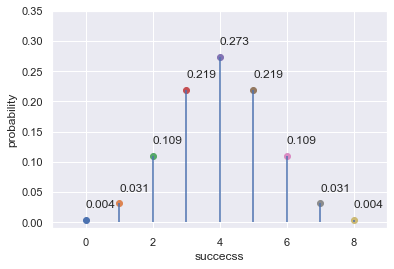

In [97]:
from scipy.special import binom

#p is taken to be 0.5, n is 8 for our example.

def bin_np(k):
    return binom(8,k)*np.power(0.5,8)


for i in range(9):
    plt.vlines(i,0,bin_np(i))
    plt.scatter(i, bin_np(i),)
    plt.xlabel('succecss')
    plt.ylabel('probability')
    plt.text(i, bin_np(i)+.02, '%.3f' % bin_np(i))
    plt.xlim(-1,9)
    plt.ylim(-.01,.35)

The cumulative distribution function is 

In [128]:
a = 0
for i in range(9):
    a = a + bin_np(i)
    print("P(X <= x) - %.3f: " %a)

P(X <= x) - 0.004: 
P(X <= x) - 0.035: 
P(X <= x) - 0.145: 
P(X <= x) - 0.363: 
P(X <= x) - 0.637: 
P(X <= x) - 0.855: 
P(X <= x) - 0.965: 
P(X <= x) - 0.996: 
P(X <= x) - 1.000: 


The $B(8, 0.5)$ distribution is, for example, the distribution of the number of heads obtained in eight tosses of a fair coin. 

The probability of obtaining exactly *four* heads in eight tosses is $P(X=4) = 0.273$ (see plot above).

Similarily, the probability of obtaining *at least six* heads in eight tosses is

$$P(X ≥ 6) = 1 − P(X ≤ 5) = 1 − 0.855 = 0.145$$

The expected number of heads obtained in eight tosses is

$E(X) = np = 8 × 0.5 = 4$

and the variance is

$Var(X) = np(1 − p) = 8 × 0.5 × 0.5 = 2$

**Proportion of Successes in Bernoulli Trials**

If the random variable $X$ counts the number of successes in $n$ independent Bernoulli trials with a constant success probability $p$, so that $X ∼ B(n, p)$, then the *proportion* of successes $Y = X/n$ has an expected value and variance of

$$E(Y ) = p$$ 

and 

$$Var(Y ) = \frac{p(1 − p)}{n}$$


The variance of the proportion $Y$ decreases as the number of trials $n$ increases, so that there is a tendency for $Y$ to become closer and closer to the success probability $p$ as the number of trials $n$ increases.

#### The Gometric Distribution

Consider a sequence of independent Bernoulli trials with a constant success probability $p$. Whereas the binomial distribution is the distribution of the number of successes occurring in a fixed number of trials $n$, it is sometimes of interest to count instead the number of trials performed until the first success occurs. Such a random variable is said to have a geometric distribution with parameter $p$, and it has a probability mass function given by

<div class="alert alert-block alert-warning">
$$P(X = x) = (1 − p)^{x−1}p$$
</div>    

for $x = 1, 2, 3, 4$.... It is easy to see that the probability mass function is of this form, because if the first success occurs on the $x$th trial, then the first $x − 1$ trials must all be failures. The probability of these $x − 1$ failures is


$(1 − p)^{x−1}$
    

which is then multiplied by $p$, the probability that the $x$th trial is a success.

It can be shown that a geometric distribution with parameter $p$ has an expected value and a variance of

<div class="alert alert-block alert-warning">
$$E(X) = \frac{1}{p}$$
</div>    

and 

$$Var(X) = \frac{1 − p}{p^2}$$

Also, the cumulative distribution function can be calculated to be

$$P(X\leq x)=\sum_{i=1}^x P(X = i) = \sum_{i=1}^x (1-p)^{i-1}p$$

$$= p(1 + (1 − p) + (1 − p)^2 + ··· + (1 − p)^{x−1})$$

$$= p (\frac{1-(1-p)^{x}}{1-(1-p)}) = 1- (1-p)^x$$

As an example, let's consider the case of $p=1/5$. The probabity mass function for this case is plotted below -

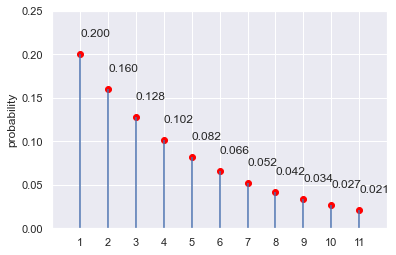

In [148]:
def gp(p, n):
    pmf =  np.power((1-p), (n-1))*p
    return round(pmf,3)
    
p =  1/5    
for i in range(1,12):
    plt.vlines(i,0,gp(p,i))
    plt.scatter(i, gp(p,i),color = 'red')
    plt.ylabel('probability')
    plt.text(i, gp(p,i)+.02, '%.3f' % gp(p,i))
    plt.xlim(0,12)
    plt.ylim(0,0.250)
    plt.xticks(range(1,12))
    

    

The cumulative distribution function will be - 

In [151]:
a = 0
for i in range(1,13):
    a = a + gp(p,i)
    print("P(X <= x) - %.3f: " %a)

P(X <= x) - 0.200: 
P(X <= x) - 0.360: 
P(X <= x) - 0.488: 
P(X <= x) - 0.590: 
P(X <= x) - 0.672: 
P(X <= x) - 0.738: 
P(X <= x) - 0.790: 
P(X <= x) - 0.832: 
P(X <= x) - 0.866: 
P(X <= x) - 0.893: 
P(X <= x) - 0.914: 
P(X <= x) - 0.931: 


-- skipped --

 - Negative Binomial Distributions
 - Hypergeometric Distributions



**The multinomial distribution** 

This distribution is an extension of the binomial distribution to the case where the “coin” has more than two outcomes. So, maybe it is a die instead of a coin. But again we want to determine the probability of getting different numbers of each
outcome given a fixed total number of outcomes.




**The Poisson distribution** 

It is often useful to define a random variable that counts the number of “events” that occur
within certain specified boundaries.

This distribution has a single parameter, usually called $\lambda$ (lambda), the “rate”. One way to think about this distribution is as follows: we are counting how often a particular thing happens. On average, that thing happens $\lambda$ times within a certain fixed period of time, but the intervals between the occurrences are random. The Poisson
distribution tells us the probability of that thing happening exactly $x$ times with the fixed period. An example would be: we are counting the number of typos in each 1000 words of text. On average, there are 5 typos per 1000 words. What is the probability that there are exactly 4 typos in the next 1000 words?


A random variable $X$ with a Poisson distribution takes the values $x = 0, 1, 2, 3, . . .$ with a probability mass function

<br>
<div class="alert alert-block alert-warning">
$$P(X = x) = \frac{e^{−λ}λ^x}{x!} $$
</div>

where $λ$ is the parameter of the distribution. This can be written

<br>

$$X ∼ P(λ)$$

<br>

which should be read “$X$ is distributed as a Poisson random variable with parameter $λ$.”

Notice that the series expansion of $e^λ$ ensures that these probability values sum to $1$ since

<br>
<div class="alert alert-block alert-warning">
$$\sum_{x=0}^\infty P(X=x)=\sum_{x=0}^\infty \frac{e^{−λ}λ^x}{x!}=e^{-λ}(\frac{1}{1}+\frac{λ}{1}+\frac{λ^2}{2!}+\frac{λ^3}{3!}+....)= e^{-λ}e^λ = 1$$
</div>
<br>

It can also be shown that if $X ∼ P(λ)$, then

<br>
<div class="alert alert-block alert-warning">
$$E(X) = Var(X) = λ$$
</div>
<br>



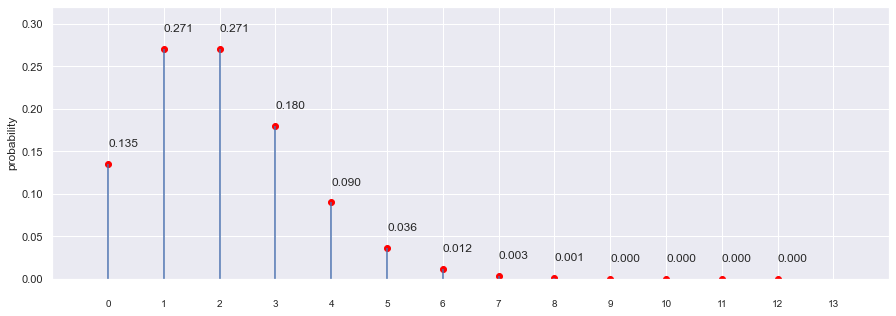

In [172]:
def pois(x,lam):
    a = (np.exp(-lam)*(np.power(lam, x)))/(np.math.factorial(x))
    return round(a,3)

plt.figure(figsize=(15,5))
for i in range(0,13):
    plt.vlines(i,0,pois(i,2))
    plt.scatter(i, pois(i,2),color = 'red')
    plt.ylabel('probability')
    plt.text(i, pois(i,2)+.02, '%.3f' % pois(i,2))
    plt.xlim(-1,14)
    plt.ylim(0,0.320)
    plt.xticks(range(0,14))
    plt.tick_params(axis = 'x', which = 'major', pad = 15, labelsize =10)
    
    

Cumulative distribution function - 

In [171]:
a = 0
for i in range(0,13):
    a = a + pois(i,2)
    print("P(X <= x) - %.3f: " %a)

P(X <= x) - 0.135: 
P(X <= x) - 0.406: 
P(X <= x) - 0.677: 
P(X <= x) - 0.857: 
P(X <= x) - 0.947: 
P(X <= x) - 0.983: 
P(X <= x) - 0.995: 
P(X <= x) - 0.998: 
P(X <= x) - 0.999: 
P(X <= x) - 0.999: 
P(X <= x) - 0.999: 
P(X <= x) - 0.999: 
P(X <= x) - 0.999: 


For $\lambda = 5$, probability mass function  is plotted below -



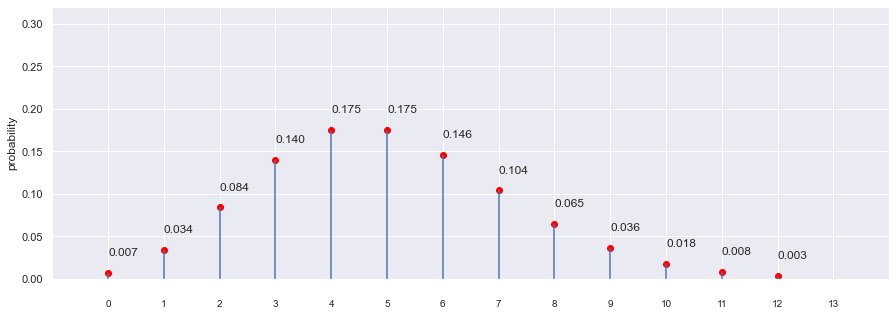

In [175]:
plt.figure(figsize=(15,5))
for i in range(0,13):
    plt.vlines(i,0,pois(i,5))
    plt.scatter(i, pois(i,5),color = 'red')
    plt.ylabel('probability')
    plt.text(i, pois(i,5)+.02, '%.3f' % pois(i,5))
    plt.xlim(-1,14)
    plt.ylim(0,0.320)
    plt.xticks(range(0,14))
    plt.tick_params(axis = 'x', which = 'major', pad = 15, labelsize =10)


It can be seen that since the mean and variance of the Poisson distribution are both equal to the parameter value, the distribution with the larger parameter value has a larger expected value and is more spread out.

As a final point, it may be useful to note that the Poisson distribution can be used to
approximate the B(n, p) distribution when n is very large (larger than 150, say) and the
success probability p is very small (smaller than 0.01, say). A parameter value of λ = np
should be used for the Poisson distribution, so that it has the same expected value as the
binomial distribution.

**Example**

Suppose that the number of errors in a piece of software has a Poisson distribution with parameter $λ = 3$. This parameter immediately implies that the expected number of errors is three and that the variance in the number of errors is also equal to three.

The distribution of the number of errors is illustrated below -

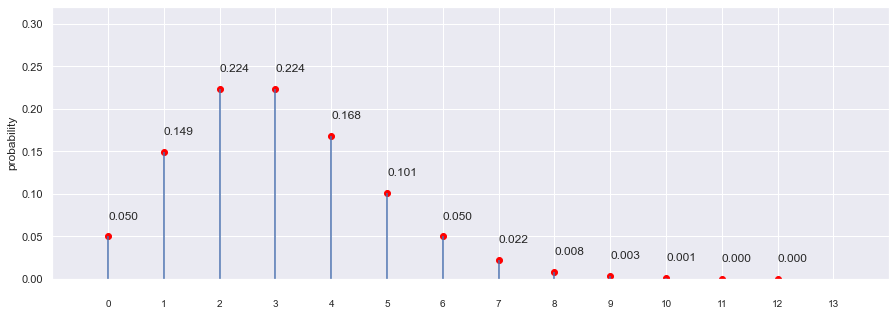

In [176]:
plt.figure(figsize=(15,5))
for i in range(0,13):
    plt.vlines(i,0,pois(i,3))
    plt.scatter(i, pois(i,3),color = 'red')
    plt.ylabel('probability')
    plt.text(i, pois(i,3)+.02, '%.3f' % pois(i,3))
    plt.xlim(-1,14)
    plt.ylim(0,0.320)
    plt.xticks(range(0,14))
    plt.tick_params(axis = 'x', which = 'major', pad = 15, labelsize =10)


The probability that a piece of software has no errors is

$P(X=0)=\frac{e^{-3}3^0}{0!}=e^{-3}=0.050$

The probability that there are three or more errors in a piece of software is

$P(X ≥ 3) = 1 − P(X = 0) − P(X = 1) − P(X = 2)$

 

In [177]:
1-0.050-0.149-0.224

0.577

A quality inspector at a glass manufacturing company inspects sheets of glass to check for any slight imperfections. Suppose that the number of these flaws in a glass sheet has a Poisson distribution with parameter $λ = 0.5$. This implies that the expected number of flaws per sheet is only $0.5$.

The pmf is plotted below - 



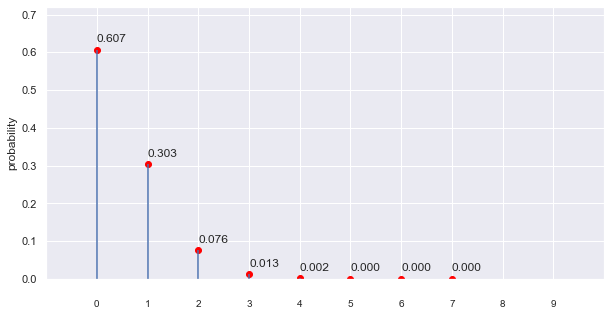

In [180]:
plt.figure(figsize=(10,5))
for i in range(0,8):
    plt.vlines(i,0,pois(i,.5))
    plt.scatter(i, pois(i,.5),color = 'red')
    plt.ylabel('probability')
    plt.text(i, pois(i,.5)+.02, '%.3f' % pois(i,.5))
    plt.xlim(-1,10)
    plt.ylim(0,0.720)
    plt.xticks(range(0,10))
    plt.tick_params(axis = 'x', which = 'major', pad = 15, labelsize =10)


The probability that there are no flaws in a sheet is

$P(X = 0) = 0.607$

so that about $61$% of the glass sheets are in “perfect” condition. Sheets with two or more flaws
are scrapped by the company, and this happens with a probability of

$P(X ≥ 2) = 1 − P(X = 0) − P(X = 1)$


In [181]:
1-0.607-0.303

0.09000000000000002

Consequently, about 9% of the glass sheets need to be scrapped and recycled through the
company’s manufacturing process.

Another example

A hospital emergency room accepts an average of about 47 bone fracture patients per week.
How might the number of bone fracture patients arriving in a certain day be modeled? Assuming
that bone fracture accidents are equally likely to occur on any day of the week, it is
reasonable to expect an average of 47/7 = 6.71 patients per day. If the Poisson distribution
is chosen to model the number of bone fracture patients, then it is appropriate to choose a
parameter value of $λ$ = 6.71 because this is the expected value of the distribution.
The hospital manager has decided to allocate emergency room resources that are sufficient
to comfortably cope with up to ten bone fracture patients per day. The Poisson distribution
can be used to predict the probability that on any given day these resources will be inadequate.
The probability that no more than ten bone fracture patients arrive at the emergency room is
predicted to be

In [187]:
a = 0
for i in range(0,11):
    a = a + pois(i,6.71)
    print("P(X <= %d) - %.3f: " %(i,a))

P(X <= 0) - 0.001: 
P(X <= 1) - 0.009: 
P(X <= 2) - 0.036: 
P(X <= 3) - 0.097: 
P(X <= 4) - 0.200: 
P(X <= 5) - 0.338: 
P(X <= 6) - 0.492: 
P(X <= 7) - 0.640: 
P(X <= 8) - 0.764: 
P(X <= 9) - 0.857: 
P(X <= 10) - 0.919: 


Consequently the manager should expect the emergency room to require additional assistance
on about 8% of days, which is an average of about 29 days per year.

<br>

#### Working with more than two variables

--skipped--